In [543]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt 

In [544]:
df = pd.read_csv(r'D:\datasets\heart.csv')

In [ ]:
Evaluating the dataset

In [545]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [546]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [547]:
# Finding out the null values
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


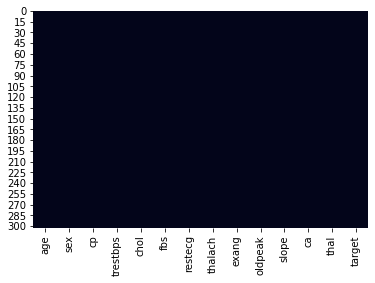

In [548]:
# finding the null values using heatmap
sns.heatmap(df.isnull(), cbar= False)

In [549]:
# No null values are present in the dataset 

In [550]:
# *EDA*

c:\intelpython3\intelpython3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until
c:\intelpython3\intelpython3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\intelpython3\intelpython3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\intelpython3\intelpython3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWar

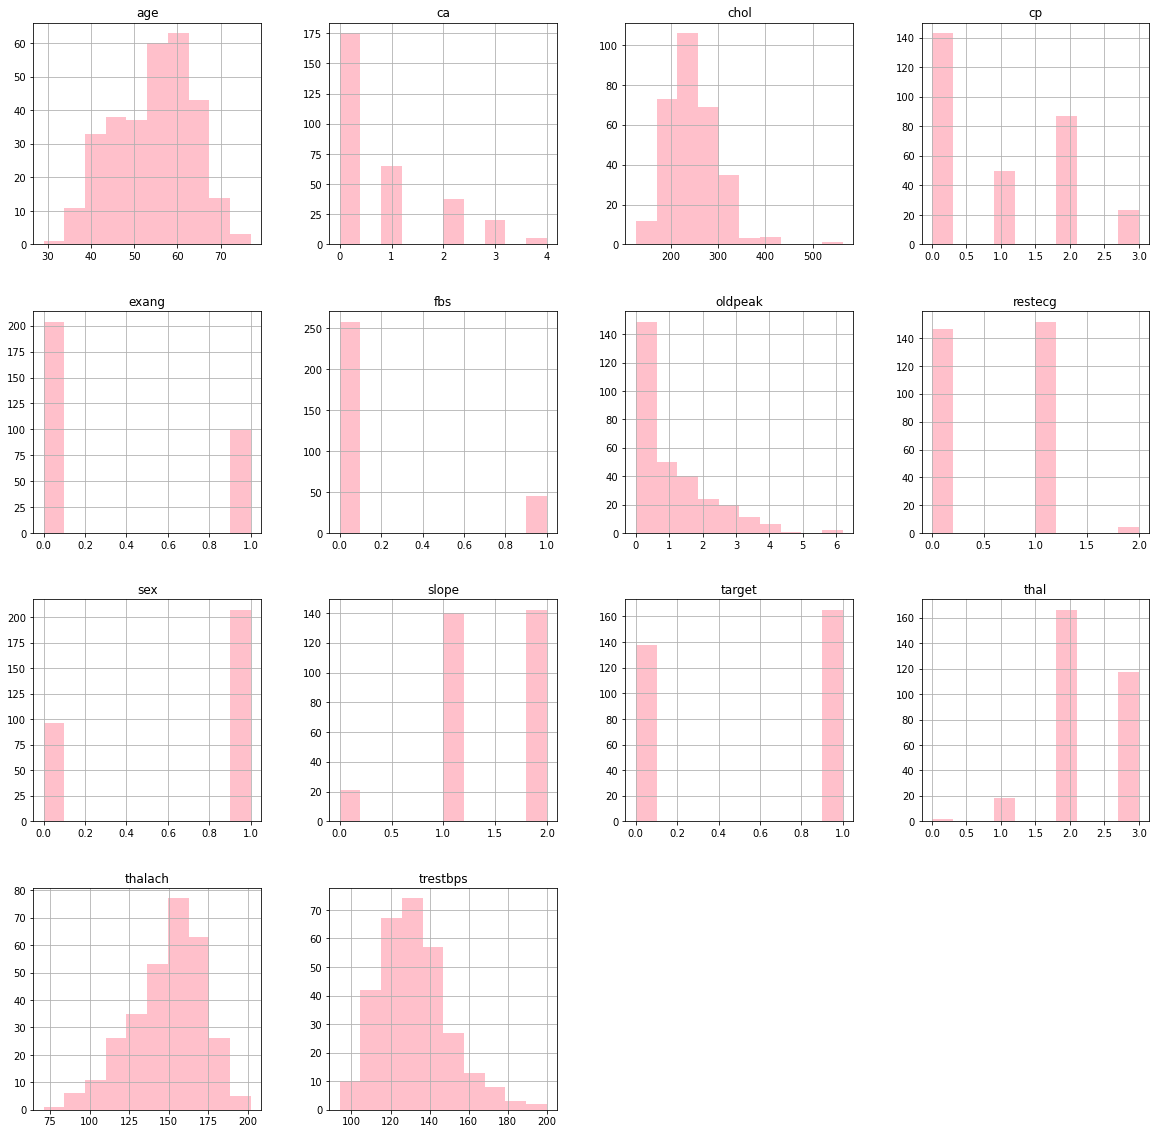

In [551]:
#plotting histograms of all the features to get the picture of the relations amog them and how to differ
fig = plt.figure(figsize = (20,20))
fig = fig.gca()
g = df.hist(ax=fig,color='pink')


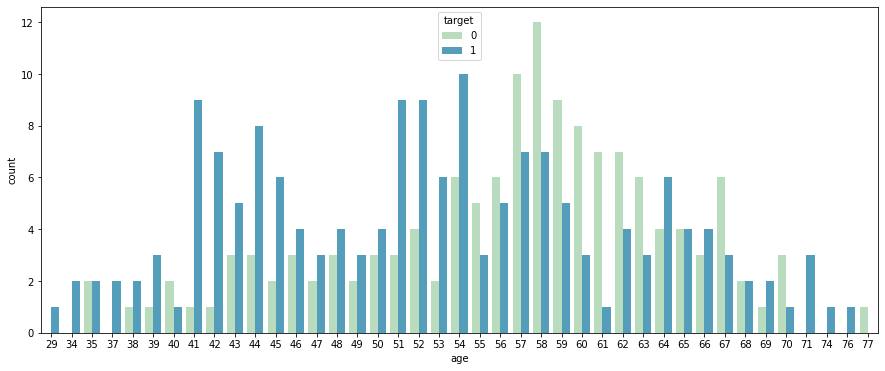

In [552]:
# visualizing the number of peole having diseases with respect to the age.
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='GnBu')
plt.show()

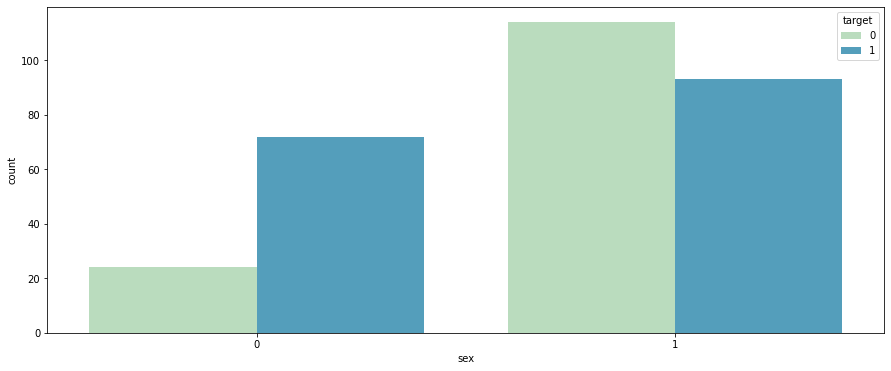

In [553]:
# Number of people diseased with respect to the Sex
plt.figure(figsize=(15,6))
sns.countplot(x='sex',data = df, hue = 'target',palette='GnBu')
plt.show()

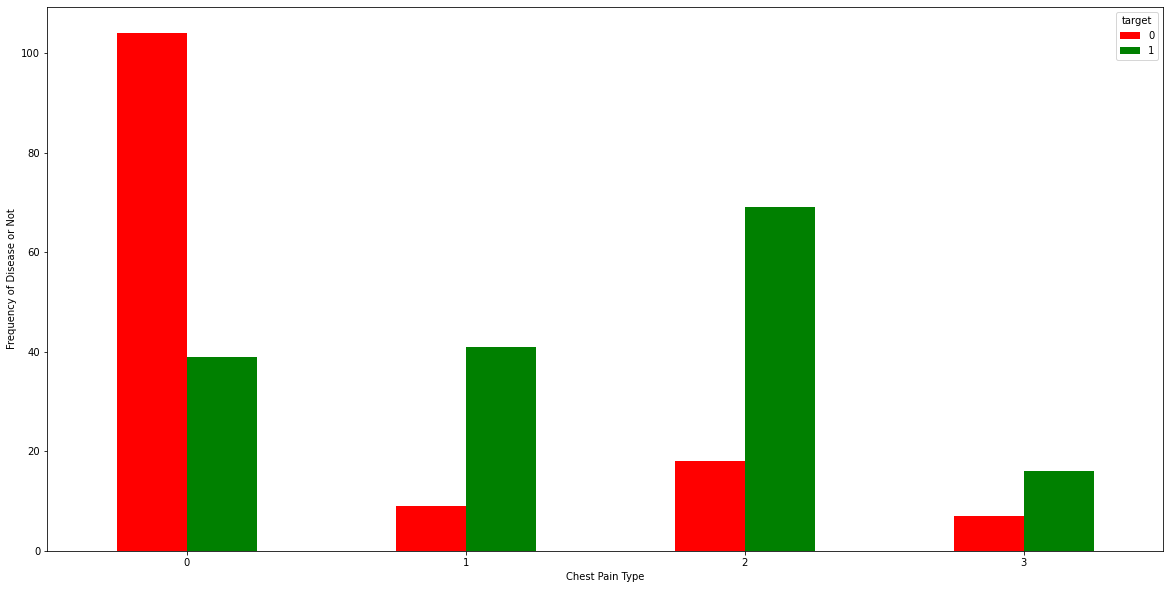

In [554]:
# visualizing the number of people with heart disease or not, with respect to the chest pain type they feel.
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(20,10),color=['red','green' ])
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [555]:
#*People diseased according to the Maximum heart rate achieved*

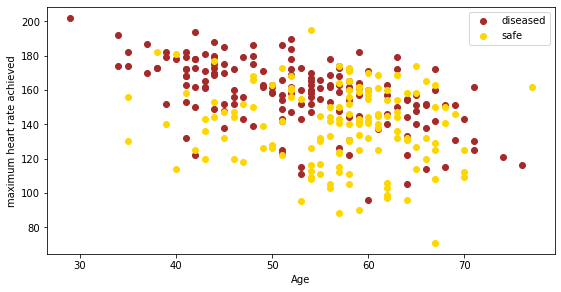

In [556]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,4)
plt.scatter(x=df.age[df.target==1],y=df.thalach[df.target==1],c='brown')
plt.scatter(x=df.age[df.target==0],y=df.thalach[df.target==0],c='gold')
plt.xlabel('Age')
plt.ylabel('maximum heart rate achieved')
plt.legend(['diseased','safe'])
plt.show()

In [557]:
#* People diseased according to the depression induced by exercise relative to rest*

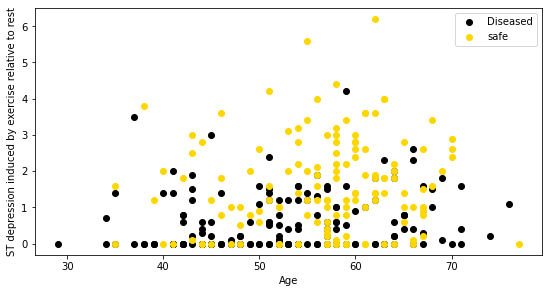

In [558]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,4)
plt.scatter(x=df.age[df.target==1],y=df.oldpeak[df.target==1],c='black')
plt.scatter(x=df.age[df.target==0],y=df.oldpeak[df.target==0],c='gold')
plt.xlabel('Age')
plt.ylabel('ST depression induced by exercise relative to rest')
plt.legend(['Diseased','safe'])
plt.show()

In [559]:
# *Finding the correlation between the features* 

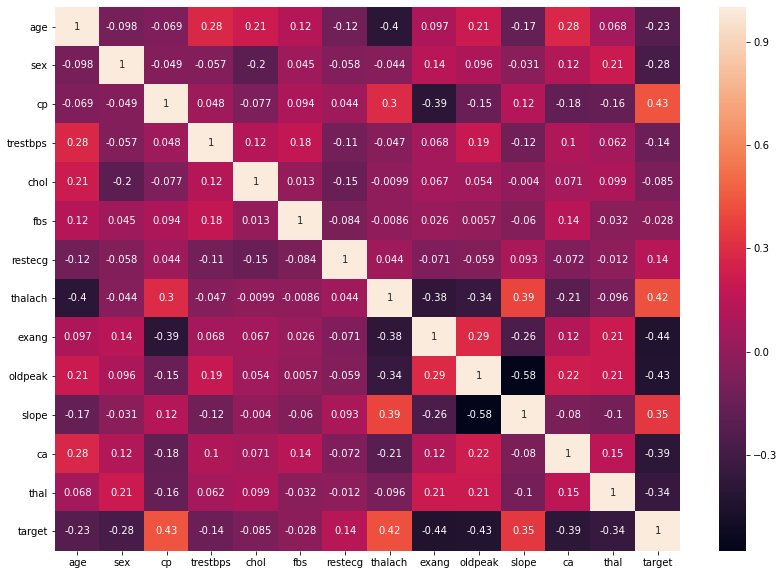

In [560]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [561]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [562]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [563]:
#**Feature Engineering**

#*categorical features*

In [564]:
# ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'] This are our nominal features 

df = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [565]:
df

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
#*Feature scaling*

In [566]:
from sklearn.preprocessing import StandardScaler
standScaler = StandardScaler()
col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[col] = standScaler.fit_transform(df[col])

In [567]:
df

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [568]:
X = df.drop(labels='target', axis=1)
y = df['target']

In [569]:
#splitting dataset to training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 50)

In [593]:
#Bringing the model at work
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [594]:
#we will try to find out the best parameters to get the best accuracy using the model selection method provided by sklearn i.e the GridSearch cross validation
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [1, 10, 100, 1000],'random_state': [10,90,100], 'criterion': ['gini']},
              {'n_estimators': [1, 10, 100, 1000],'random_state': [10,90,100], 'criterion': ['entropy']}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 14,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

c:\intelpython3\intelpython3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [595]:
#finding the best score
grid_search.best_score_

0.8677685950413223

In [607]:
grid_search.best_params_

{'criterion': 'entropy', 'n_estimators': 100, 'random_state': 90}

In [618]:
#Printing the accuracy with the cross validation with the best params.
cvs = cross_val_score(RandomForestClassifier(n_estimators = 100, random_state = 90, criterion = 'entropy'), X_train, y_train, cv=14)
print("Accuracy: {}%".format(round(cvs.mean(), 4)*100))

Accuracy: 86.71%


In [ ]:
# Finally we got the accuracy 86.71%